# ЛР2 ТМО. Канаева Диана ИУ5-62Б

### Задачи лабораторной работы:

 - обработка пропусков в данных
 - кодирование категориальных признаков
 - масштабирование данных

Использован датасет Video Games Sales. Описание столбцов в датасете:

Rank - рейтинг общих продаж

Name - название игры

Platform - платформа выпуска

Year - год выпуска

Genre - жанр игры

Publisher - автор игры

NA_Sales - продажи в Северной Америке

EU_Sales - продажи в Европе

JP_Sales - продажи в Японии

Other_Sales - другие продажи по всему миру

Global_Sales - общий объем продаж по всеми миру

In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [88]:
data = pd.read_csv('vgsales.csv')

In [89]:
# Первые 5 строк датасета
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,NaN,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [90]:
data.shape

(16598, 11)

In [91]:
# Список колонок с типами данных
data.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [92]:
# Проверим наличие пустых значений
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             2
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

### 1) Обработка пропусков в данных. Возможные методы:

 - удаление строк с отсутствующими значениями

 - удаление столбцов с отсутствующими значениями

 - заполнение пустых полей

In [93]:
# Удаление строк с отсутствующими значениями
data_1 = data.dropna(axis=0, how='any')
(data.shape, data_1.shape)

((16598, 11), (16289, 11))

In [94]:
# Удаление столбцов с отсутствующими значениями
data_2 = data.dropna(axis=1, how='any')
(data.shape, data_2.shape)

((16598, 11), (16598, 8))

In [95]:
# Заполнение пустых полей значениями "Unknown" и 0
# Так как данные двух разных типов, разделим датасет на две части по типам переменных
# Раздельно проведем обработку и "склеим" датасеты, проверив совпадение размера с исходным
data_3 = data[['Name','Platform','Genre','Publisher']]
data_4 = data[['Rank','Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
data_3 = data_3.fillna('Unknown')
data_4 = data_4.fillna(0)
data_5 = pd.merge(data_3, data_4, left_index=True, right_index=True)
(data.shape, data_3.shape, data_4.shape, data_5.shape)

((16598, 11), (16598, 4), (16598, 7), (16598, 11))

In [96]:
data_1.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


In [97]:
data_3.head()

,Name,Platform,Genre,Publisher
0,Wii Sports,Wii,Sports,Nintendo
1,Super Mario Bros.,NES,Platform,Nintendo
2,Mario Kart Wii,Wii,Racing,Nintendo
3,Wii Sports Resort,Wii,Unknown,Nintendo
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo


In [98]:
data_5.head()

,Name,Platform,Genre,Publisher,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,Sports,Nintendo,1,2006.0,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,Platform,Nintendo,2,1985.0,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,Racing,Nintendo,3,2008.0,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,Unknown,Nintendo,4,2009.0,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,5,1996.0,11.27,8.89,10.22,1.00,31.37


### 2) Кодирование категориальных признаков. Возможные методы:

 - кодирование категорий целочисленными значениями (label encoding)

 - кодирование категорий наборами бинарных значений (one-hot encoding)

In [99]:
# Для кодирования категорий датасет не должен иметь пропусков
data_5.isnull().sum()

Name            0
Platform        0
Genre           0
Publisher       0
Rank            0
Year            0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [100]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [101]:
# Кодирование категорий целочисленными значениями
data_5['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Unknown', 'Role-Playing',
       'Puzzle', 'Misc', 'Shooter', 'Simulation', 'Action', 'platform',
       'Fighting', 'Adventure', 'Strategy'], dtype=object)

In [102]:
# Жанр Platform записан двумя разными способами, исправим, приведя к единому стилю
data_0 = data_5['Genre'].replace('platform','Platform')
data_0.unique()

array(['Sports', 'Platform', 'Racing', 'Unknown', 'Role-Playing',
       'Puzzle', 'Misc', 'Shooter', 'Simulation', 'Action', 'Fighting',
       'Adventure', 'Strategy'], dtype=object)

In [103]:
le = LabelEncoder()
data_le = le.fit_transform(data_0.unique())
data_le

array([10,  4,  6, 12,  7,  5,  3,  8,  9,  0,  2,  1, 11])

In [104]:
# Кодирование категорий наборами бинарных значений
ohe = OneHotEncoder()
data_ohe = ohe.fit_transform(data[['Year']])
print (data_ohe)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16598 stored elements and shape (16598, 41)>
  Coords	Values
  (0, 27)	1.0
  (1, 6)	1.0
  (2, 29)	1.0
  (3, 30)	1.0
  (4, 17)	1.0
  (5, 10)	1.0
  (6, 27)	1.0
  (7, 27)	1.0
  (8, 30)	1.0
  (9, 5)	1.0
  (10, 26)	1.0
  (11, 26)	1.0
  (12, 20)	1.0
  (13, 28)	1.0
  (14, 30)	1.0
  (15, 31)	1.0
  (16, 34)	1.0
  (17, 25)	1.0
  (18, 11)	1.0
  (19, 26)	1.0
  (20, 27)	1.0
  (21, 10)	1.0
  (22, 9)	1.0
  (23, 34)	1.0
  (24, 23)	1.0
  :	:
  (16573, 28)	1.0
  (16574, 29)	1.0
  (16575, 29)	1.0
  (16576, 37)	1.0
  (16577, 30)	1.0
  (16578, 32)	1.0
  (16579, 21)	1.0
  (16580, 29)	1.0
  (16581, 32)	1.0
  (16582, 22)	1.0
  (16583, 20)	1.0
  (16584, 24)	1.0
  (16585, 32)	1.0
  (16586, 30)	1.0
  (16587, 30)	1.0
  (16588, 29)	1.0
  (16589, 37)	1.0
  (16590, 28)	1.0
  (16591, 25)	1.0
  (16592, 29)	1.0
  (16593, 23)	1.0
  (16594, 24)	1.0
  (16595, 29)	1.0
  (16596, 31)	1.0
  (16597, 24)	1.0


### 3) Масштабирование данных. Возможные методы:

 - MinMax масштабирование: значения лежат в диапазоне от 0 до 1

 - на основе Z-оценки: большинство значений попадает в диапазон от -3 до 3

In [105]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [106]:
# Среди годов издания встречаются неадекватные значения, удалим их
a = 1
data_t = data
while (a < 100):
  a = np.min(data_t['Year'])
  print (a)
  min_index = data_t['Year'].idxmin()
  data_t = data_t.drop(min_index)

20.0
20.0
20.0
20.0
1980.0


In [107]:
np.min(data_t['Year'])
# Это уже похоже на правду

np.float64(1980.0)

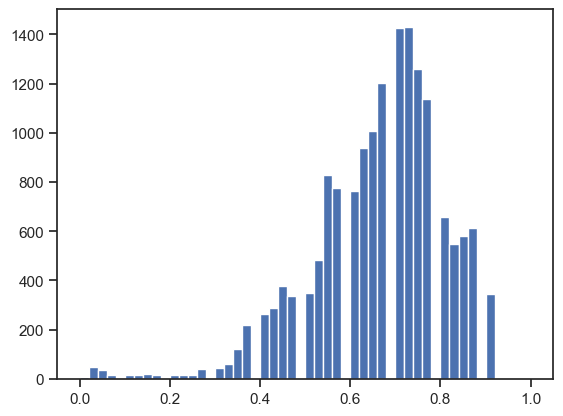

In [108]:
# MinMax масштабирование
sc1 = MinMaxScaler()
data_sc1 = sc1.fit_transform(data_t[['Year']])
plt.hist(data_sc1, 50)
plt.show()

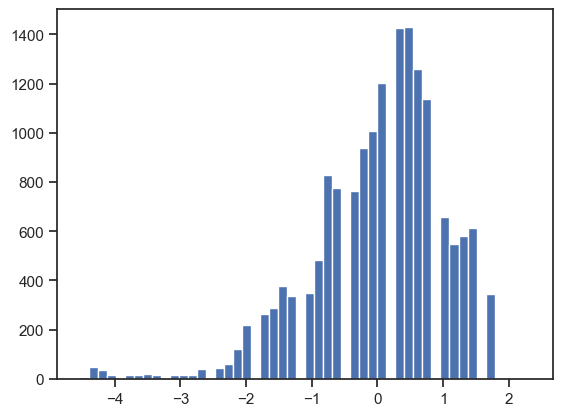

In [109]:
# Mасштабирование на основе Z-оценки
sc2 = StandardScaler()
data_sc2 = sc2.fit_transform(data_t[['Year']])
plt.hist(data_sc2, 50)
plt.show()